In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
zoo_data = pd.read_csv("C:/Users/Shubham Tiwari/Downloads/Zoo (1).csv")
zoo_data.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [3]:
zoo_data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [4]:
zoo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


# Standardize the Variables

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaler.fit(zoo_data.drop("animal name",axis=1))

StandardScaler()

In [7]:
scaled_features = scaler.transform(zoo_data.drop("animal name",axis=1))
scaled_features

array([[ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  0.55839574],
       ...,
       [ 1.16139451, -0.49690399, -1.18522652, ..., -0.38435306,
         1.13818037, -0.87545095],
       [-0.86103386, -0.49690399,  0.84372057, ..., -0.38435306,
        -0.87859537,  1.99224243],
       [-0.86103386,  2.01246118,  0.84372057, ..., -0.38435306,
        -0.87859537, -0.39750205]])

In [8]:
zoo_data_feat = pd.DataFrame(scaled_features,columns=zoo_data.columns[:-1])
zoo_data_feat.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
1,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,-1.115547,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451
2,-0.861034,-0.496904,0.843721,-0.826640,-0.558291,1.343710,0.896421,0.809776,0.46569,-1.951800,-0.293294,2.222876,-1.404435,0.588784,-0.384353,-0.878595,0.558396
3,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,-1.698416,-0.384353,1.138180,-0.875451
4,1.161395,-0.496904,-1.185227,1.209717,-0.558291,-0.744208,0.896421,0.809776,0.46569,0.512348,-0.293294,-0.449868,0.572540,0.588784,-0.384353,1.138180,-0.875451


# Train-Test Split :

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled_features, zoo_data["type"], test_size=0.3) 

# Using KNN :

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [13]:
pred = knn.predict(X_test)

In [14]:
# Predictions and Evaluations :

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [15]:
print(confusion_matrix(y_test,pred))

[[15  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  4]]


In [16]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           0.97        31
   macro avg       0.79      0.86      0.81        31
weighted avg       0.95      0.97      0.96        31



C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

# Chossing a K-Value :

In [17]:
accuracy_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,zoo_data_feat,zoo_data["type"],cv=10)
    accuracy_rate.append(score.mean())

C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\model_selection\_split.py:680: UserWarning: The least populated class in y

In [18]:
error_rate = []

for i in range(1,40) :
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

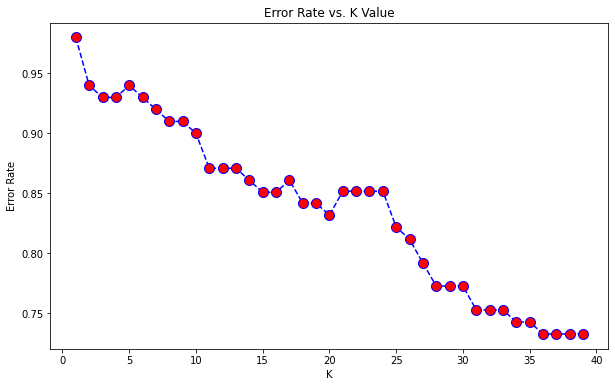

In [19]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),accuracy_rate,color="blue",linestyle="dashed",
        marker = "o", markerfacecolor = "red",markersize=10 )
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [20]:
# First for a quick comparison to our original k=2 :

knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("K=2")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

K=2


[[15  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  4]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         1
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           0.97        31
   macro avg       0.79      0.86      0.81        31
weighted avg       0.95      0.97      0.96        31



C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Shubham Tiwari\.conda\envs\rstudio\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [21]:
# Now with k=1:

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print("K=1")
print("\n")
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

K=1


[[15  0  0  0  0  0  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  4  0]
 [ 0  0  0  0  0  0  4]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4

    accuracy                           1.00        31
   macro avg       1.00      1.00      1.00        31
weighted avg       1.00      1.00      1.00        31

